## WNBA 2024 Rookie of The Year Race

The 2024 WNBA season has been electrified by the arrival of two standout rookies: Caitlin Clark of the Indiana Fever and Angel Reese of the Chicago Sky. Both players entered the league with tremendous college résumés, high expectations, and massive fan followings.

Their early performances have sparked intense debate among fans, analysts, and media outlets: Who’s having the better rookie season?

This analysis dives into their stats, team impact, and game-by-game performance—particularly focusing on how they perform against different opponents—to offer a data-driven perspective on the Rookie of the Year race.

### Table of contents
1. **Importing Data**   
Loading the datasets and setting up the environment for analysis.   
2. **Exploratory Data Analysis (EDA)**   
Basic stats comparison (points, rebounds, assists, etc.)   
Game-by-game trends   
Team impact and win/loss breakdown   
3. **Conclusion**   
Summary of findings and insights into the Rookie of the Year conversation.

### 1. Importing data using nba_api

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)
import datetime as dt
import time
from nba_api.stats.endpoints import leaguegamelog, teamgamelog, leaguedashplayerstats, commonplayerinfo, leaguestandings

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()
plt.style.use('bmh')

In [96]:
url = "https://www.basketball-reference.com/wnba/years/2024_standings.html"
tables = pd.read_html(url)
standings_2024 = tables[0]
standings_2024.to_csv('standings_2024.csv',index=False)

In [2]:
wnba_league_id = '10'
season = '2024'

stats = leaguedashplayerstats.LeagueDashPlayerStats(
    season=season,
    league_id_nullable=wnba_league_id,
    season_type_all_star='Regular Season'
)

df = stats.get_data_frames()[0]

player_ids = df['PLAYER_ID'].unique()

player_info_list = []

for player_id in player_ids:
    try:
        info = commonplayerinfo.CommonPlayerInfo(player_id=player_id)
        data = info.get_data_frames()[0]  
        player_info_list.append(data.iloc[0].to_dict())
        time.sleep(0.6)
    except Exception as e:
        print(f"Error fetching data for player ID {player_id}: {e}")

player_info_df = pd.DataFrame(player_info_list)

roty_info=player_info_df[(player_info_df['DISPLAY_FIRST_LAST']=='Caitlin Clark')|(player_info_df['DISPLAY_FIRST_LAST']=='Angel Reese')]

roty_info.drop(columns={
    'FIRST_NAME', 'LAST_NAME','DISPLAY_LAST_COMMA_FIRST', 'DISPLAY_FI_LAST', 'PLAYER_SLUG','LAST_AFFILIATION', 'HEIGHT','WEIGHT', 'SEASON_EXP', 
    'JERSEY', 'POSITION', 'ROSTERSTATUS','GAMES_PLAYED_CURRENT_SEASON_FLAG', 'TEAM_ID', 'TEAM_NAME','TEAM_ABBREVIATION', 'TEAM_CODE', 'TEAM_CITY', 
    'PLAYERCODE','FROM_YEAR', 'TO_YEAR', 'DLEAGUE_FLAG', 'NBA_FLAG', 'GAMES_PLAYED_FLAG','GREATEST_75_FLAG'
},inplace=True)
roty_info.head()

,PERSON_ID,DISPLAY_FIRST_LAST,BIRTHDATE,SCHOOL,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
11,1642291,Angel Reese,2002-05-06T00:00:00,Louisiana State,USA,2024,1,7
24,1642286,Caitlin Clark,2002-01-22T00:00:00,Iowa,USA,2024,1,1


In [5]:
roty_info.to_csv('rotyinfo.csv',index=False)

In [7]:
CAITLIN_CLARK_ID = 1642286
ANGEL_REESE_ID = 1642291
SEASON = '2024'
LEAGUE_ID = '10' 

def safe_api_call(func, retries=5, delay=3, backoff=2):
    for i in range(retries):
        try:
            return func()
        except Exception as e:
            print(f"⚠️ Attempt {i+1} failed: {e}")
            time.sleep(delay)
            delay *= backoff
    return None

def get_player_gamelogs(player_id, season=SEASON):
    def call():
        logs = leaguegamelog.LeagueGameLog(
            season=season,
            league_id=LEAGUE_ID,
            player_or_team_abbreviation='P'
        )
        return logs.get_data_frames()[0]

    df = safe_api_call(call)
    if df is None:
        return pd.DataFrame(), 0

    player_df = df[df['PLAYER_ID'] == int(player_id)].copy()
    return player_df, player_df['GAME_ID'].nunique()

clark_df, _ = get_player_gamelogs(CAITLIN_CLARK_ID)
time.sleep(1)

reese_df, _ = get_player_gamelogs(ANGEL_REESE_ID)
time.sleep(1)

clark_df.to_csv('clark_game_logs.csv', index=False)
reese_df.to_csv('reese_game_logs.csv', index=False)

In [5]:
clark_df=pd.read_csv('clark_game_logs.csv')
clark_df.head()

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400002,2024-05-14,IND @ CON,L,32,5,15,0.333,4,11,0.364,6,6,1.000,0,0,0,3,2,0,10,4,20,-13,20.5,1
1,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400007,2024-05-16,IND vs. NYL,L,30,2,8,0.250,1,7,0.143,4,4,1.000,0,7,7,6,0,1,3,5,9,-24,26.4,1
2,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400010,2024-05-18,IND @ NYL,L,34,9,17,0.529,4,10,0.400,0,0,NaN,2,4,6,8,1,0,8,3,22,-9,36.2,1
3,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400015,2024-05-20,IND vs. CON,L,27,5,11,0.455,3,7,0.429,4,4,1.000,0,3,3,5,0,2,5,5,17,-18,29.1,1
4,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400020,2024-05-22,IND @ SEA,L,33,6,16,0.375,2,8,0.250,7,9,0.778,1,6,7,7,0,2,3,0,21,7,42.9,1


In [7]:
reese_df=pd.read_csv('reese_game_logs.csv')
reese_df.head()

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,22024,1642291,Angel Reese,1611661329,CHI,Chicago Sky,1022400005,2024-05-15,CHI @ DAL,L,26,5,14,0.357,0,0,NaN,2,8,0.250,5,3,8,1,1,0,2,5,12,-7,24.1,1
1,22024,1642291,Angel Reese,1611661329,CHI,Chicago Sky,1022400012,2024-05-18,CHI @ DAL,W,25,3,9,0.333,0,1,0.0,5,7,0.714,7,2,9,2,1,0,2,4,11,17,25.8,1
2,22024,1642291,Angel Reese,1611661329,CHI,Chicago Sky,1022400022,2024-05-23,CHI @ NYL,W,31,3,10,0.300,0,0,NaN,7,9,0.778,3,6,9,1,1,0,1,3,13,7,27.3,1
3,22024,1642291,Angel Reese,1611661329,CHI,Chicago Sky,1022400026,2024-05-25,CHI vs. CON,L,33,4,9,0.444,0,1,0.0,5,6,0.833,3,2,5,2,1,0,2,3,13,-6,23.0,1
4,22024,1642291,Angel Reese,1611661329,CHI,Chicago Sky,1022400034,2024-05-28,CHI vs. SEA,L,30,4,9,0.444,0,0,NaN,3,3,1.000,6,6,12,3,2,0,3,2,11,-12,32.9,1


In [19]:
roty = pd.concat([clark_df, reese_df], ignore_index=True)
roty.head()

,SEASON_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,FANTASY_PTS,VIDEO_AVAILABLE
0,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400002,2024-05-14,IND @ CON,L,32,5,15,0.333,4,11,0.364,6,6,1.000,0,0,0,3,2,0,10,4,20,-13,20.5,1
1,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400007,2024-05-16,IND vs. NYL,L,30,2,8,0.250,1,7,0.143,4,4,1.000,0,7,7,6,0,1,3,5,9,-24,26.4,1
2,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400010,2024-05-18,IND @ NYL,L,34,9,17,0.529,4,10,0.400,0,0,NaN,2,4,6,8,1,0,8,3,22,-9,36.2,1
3,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400015,2024-05-20,IND vs. CON,L,27,5,11,0.455,3,7,0.429,4,4,1.000,0,3,3,5,0,2,5,5,17,-18,29.1,1
4,22024,1642286,Caitlin Clark,1611661325,IND,Indiana Fever,1022400020,2024-05-22,IND @ SEA,L,33,6,16,0.375,2,8,0.250,7,9,0.778,1,6,7,7,0,2,3,0,21,7,42.9,1


In [17]:
roty.to_csv('roty.csv',index=False)

In [9]:
standings_2024=pd.read_csv('standings_2024.csv')

### 2. Exploratory Data Analysis (EDA)

In [15]:
rotyinfo=pd.read_csv('rotyinfo.csv')
rotyinfo.head()

,PERSON_ID,DISPLAY_FIRST_LAST,BIRTHDATE,SCHOOL,COUNTRY,DRAFT_YEAR,DRAFT_ROUND,DRAFT_NUMBER
0,1642291,Angel Reese,2002-05-06T00:00:00,Louisiana State,USA,2024,1,7
1,1642286,Caitlin Clark,2002-01-22T00:00:00,Iowa,USA,2024,1,1


Both players where picked in first round of the draft with **Caitlin Clark** being **1st** pick, drafted by **Indiana Fever**, and **Angel Reese** being **7th** pick, drafted by **Chicago Sky**.

In [21]:
roty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          74 non-null     int64  
 1   PLAYER_ID          74 non-null     int64  
 2   PLAYER_NAME        74 non-null     object 
 3   TEAM_ID            74 non-null     int64  
 4   TEAM_ABBREVIATION  74 non-null     object 
 5   TEAM_NAME          74 non-null     object 
 6   GAME_ID            74 non-null     int64  
 7   GAME_DATE          74 non-null     object 
 8   MATCHUP            74 non-null     object 
 9   WL                 74 non-null     object 
 10  MIN                74 non-null     int64  
 11  FGM                74 non-null     int64  
 12  FGA                74 non-null     int64  
 13  FG_PCT             74 non-null     float64
 14  FG3M               74 non-null     int64  
 15  FG3A               74 non-null     int64  
 16  FG3_PCT            52 non-nu

In [23]:
roty.drop(columns={'SEASON_ID','PLAYER_ID','TEAM_ID','GAME_ID','FANTASY_PTS','VIDEO_AVAILABLE'},inplace=True)

In [27]:
roty.fillna(0,inplace=True)

In [25]:
roty.GAME_DATE=pd.to_datetime(roty['GAME_DATE'])
roty['GAME_DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 74 entries, 0 to 73
Series name: GAME_DATE
Non-Null Count  Dtype         
--------------  -----         
74 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 724.0 bytes


In [27]:
roty['MONTH']=roty['GAME_DATE'].dt.month

In [29]:
roty['WEEK'] = roty['GAME_DATE'].dt.to_period('W').apply(lambda r: r.start_time)

In [31]:
roty.rename(columns={'PLAYER_NAME':'PLAYER'},inplace=True)

In [33]:
roty.head()

,PLAYER,TEAM_ABBREVIATION,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,MONTH,WEEK
0,Caitlin Clark,IND,Indiana Fever,2024-05-14,IND @ CON,L,32,5,15,0.333,4,11,0.364,6,6,1.000,0,0,0,3,2,0,10,4,20,-13,5,2024-05-13
1,Caitlin Clark,IND,Indiana Fever,2024-05-16,IND vs. NYL,L,30,2,8,0.250,1,7,0.143,4,4,1.000,0,7,7,6,0,1,3,5,9,-24,5,2024-05-13
2,Caitlin Clark,IND,Indiana Fever,2024-05-18,IND @ NYL,L,34,9,17,0.529,4,10,0.400,0,0,NaN,2,4,6,8,1,0,8,3,22,-9,5,2024-05-13
3,Caitlin Clark,IND,Indiana Fever,2024-05-20,IND vs. CON,L,27,5,11,0.455,3,7,0.429,4,4,1.000,0,3,3,5,0,2,5,5,17,-18,5,2024-05-20
4,Caitlin Clark,IND,Indiana Fever,2024-05-22,IND @ SEA,L,33,6,16,0.375,2,8,0.250,7,9,0.778,1,6,7,7,0,2,3,0,21,7,5,2024-05-20


In [82]:
total_games_played=roty.groupby('PLAYER')['PLAYER'].count().reset_index(name='GAMES_PLAYED')
total_games_played

,PLAYER,GAMES_PLAYED
0,Angel Reese,34
1,Caitlin Clark,40


**Caitlin Clark** played all **40** games in regular season, while **Angel Reese's** rookie season has come to an end a bit earlier, following a wrist injury, with the total of **34** games.

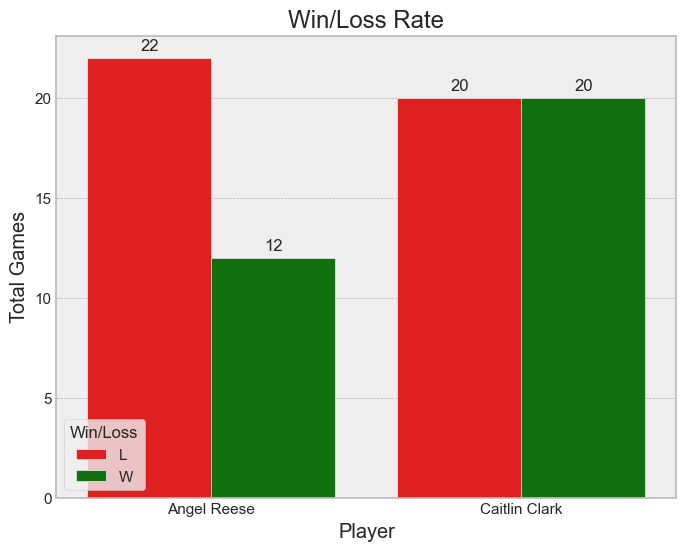

In [84]:
total_games=roty.groupby(['PLAYER','WL'])['WL'].count().reset_index(name='total')
plt.figure(figsize=(8,6))
barplot=sns.barplot(data=total_games,x='PLAYER',y='total',hue='WL',palette={'W': 'green', 'L': 'red'})
for container in barplot.containers:
    barplot.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Win/Loss Rate')
plt.ylabel('Total Games')
plt.xlabel('Player')
plt.legend(title='Win/Loss')
plt.show()


In [17]:
standings_2024.index = range(1, len(standings_2024) + 1)
standings_2024

,Team,W,L,W/L%,GB
1,New York Liberty*,32,8,0.800,—
2,Minnesota Lynx*,30,10,0.750,2.0
3,Connecticut Sun*,28,12,0.700,4.0
4,Las Vegas Aces*,27,13,0.675,5.0
5,Seattle Storm*,25,15,0.625,7.0
6,Indiana Fever*,20,20,0.500,12.0
7,Phoenix Mercury*,19,21,0.475,13.0
8,Atlanta Dream*,15,25,0.375,17.0
9,Washington Mystics,14,26,0.350,18.0
10,Chicago Sky,13,27,0.325,19.0


Following Angel Reese’s injury, **Chicago’s** performance declined sharply, resulting in only one additional win and a final standing of **10th** place. With the top 8 teams advancing, they narrowly missed the playoffs. Meanwhile, the **Indiana Fever** secured their postseason spot by finishing **6th** with 20 wins.

In [19]:
palette={'Angel Reese': 'skyblue', 'Caitlin Clark': 'red'}

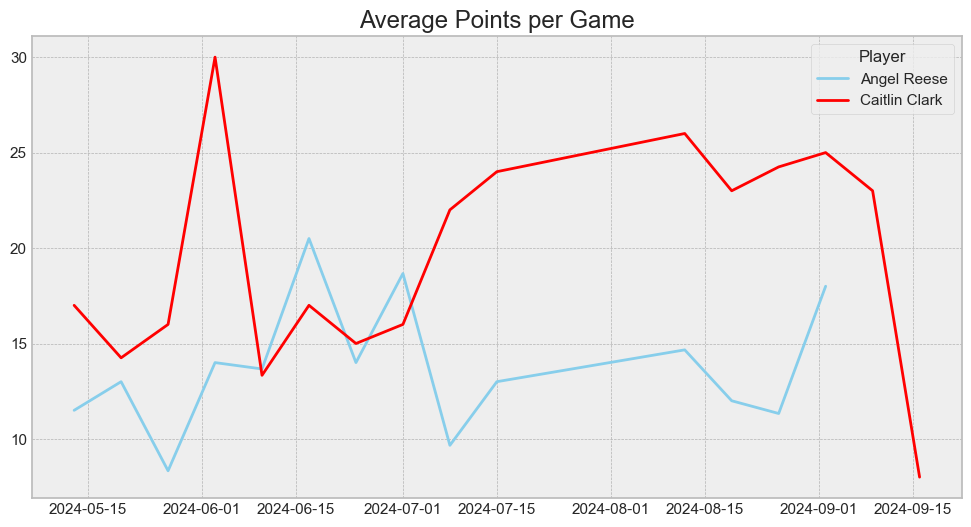

In [86]:
avg_points=roty.groupby(['WEEK','PLAYER'])['PTS'].mean().reset_index(name='avg_pts')
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_points,x='WEEK',y='avg_pts',hue='PLAYER',palette=palette,ci=None)
plt.title('Average Points per Game')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Player')
plt.show()

In [88]:
avg_points_by_player=roty.groupby('PLAYER')[['PTS','FG_PCT','FG3_PCT','FT_PCT']].mean().round(2)
avg_points_by_player[['FG_PCT','FG3_PCT','FT_PCT']]=(avg_points_by_player[['FG_PCT','FG3_PCT','FT_PCT']]*100).applymap(lambda x: f'{x:.0f}%')
avg_points_by_player

,PTS,FG_PCT,FG3_PCT,FT_PCT
PLAYER,,,,
Angel Reese,13.59,39%,4%,70%
Caitlin Clark,19.23,41%,35%,82%


When comparing average points per game, the line plot clearly shows that Caitlin Clark outperformed Angel Reese, averaging **19.23** points per game compared to Reese's **13.59**. While they play different positions, Clark as a *point guard* (PG) and Reese as a *power forward* (PF), Clark also had higher shooting percentages. She posted slightly better field goal and free throw percentages, and her three-point shooting percentage was notably higher by approximately 30%.

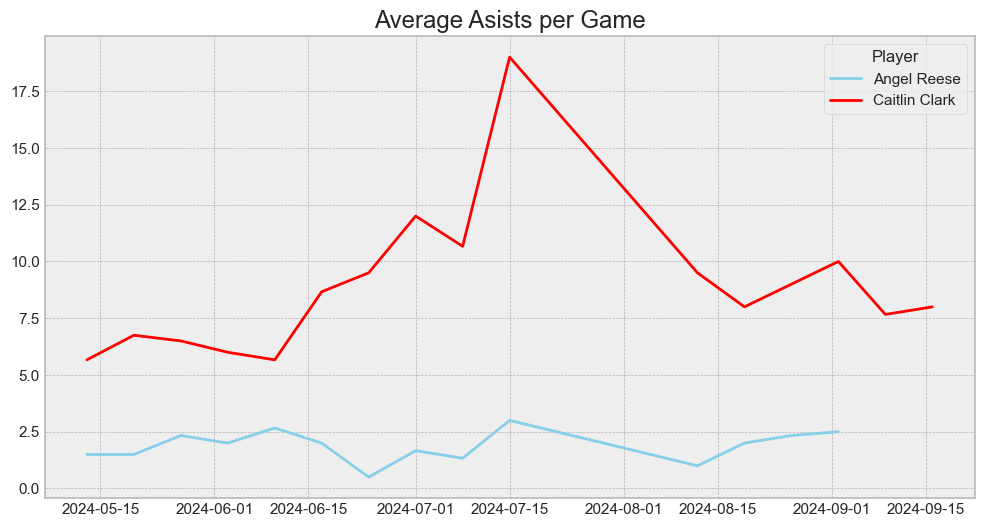

In [90]:
avg_asist=roty.groupby(['WEEK','PLAYER'])['AST'].mean().reset_index(name='avg_asist')
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_asist,x='WEEK',y='avg_asist',hue='PLAYER',palette=palette,ci=None)
plt.title('Average Asists per Game')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Player')
plt.show()

In [94]:
asists=roty.groupby('PLAYER')['AST'].mean().round(2).reset_index(name='AVG_ASISTS')
asists

,PLAYER,AVG_ASISTS
0,Angel Reese,1.85
1,Caitlin Clark,8.43


The line plot clearly shows that Clark averages significantly more assists per game than Reese, with **8.43** assists, an expected number for a point guard.

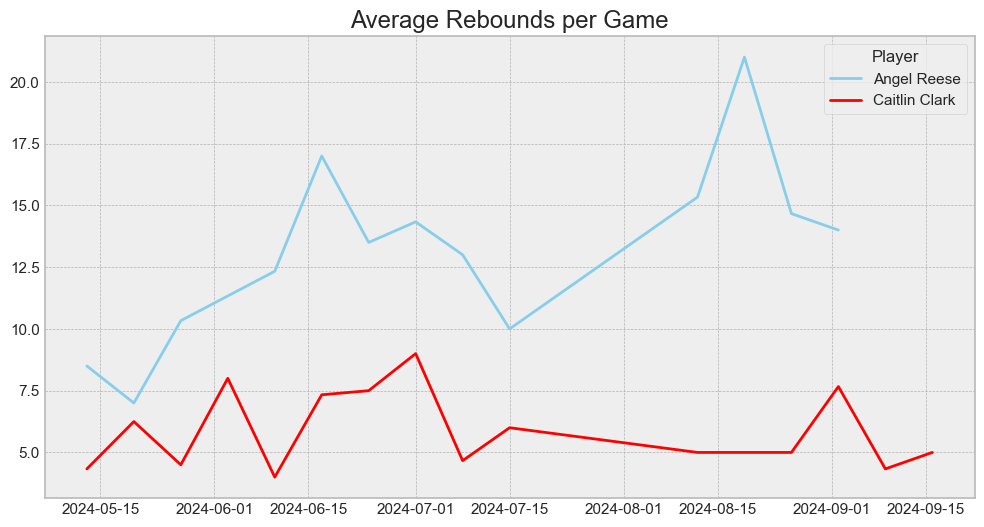

In [97]:
avg_reb=roty.groupby(['WEEK','PLAYER'])['REB'].mean().reset_index(name='avg_rebound')
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_reb,x='WEEK',y='avg_rebound',hue='PLAYER',palette=palette,ci=None)
plt.title('Average Rebounds per Game')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Player')
plt.show()

In [101]:
rebounds=roty.groupby('PLAYER')[['REB','OREB','DREB']].mean().round(2)
rebounds

,REB,OREB,DREB
PLAYER,,,
Angel Reese,13.12,5.06,8.06
Caitlin Clark,5.68,0.35,5.32


As expected for a power forward, Angel Reese has a higher average number of rebounds, both offensive and defensive, totaling **13.12** rebounds per game.

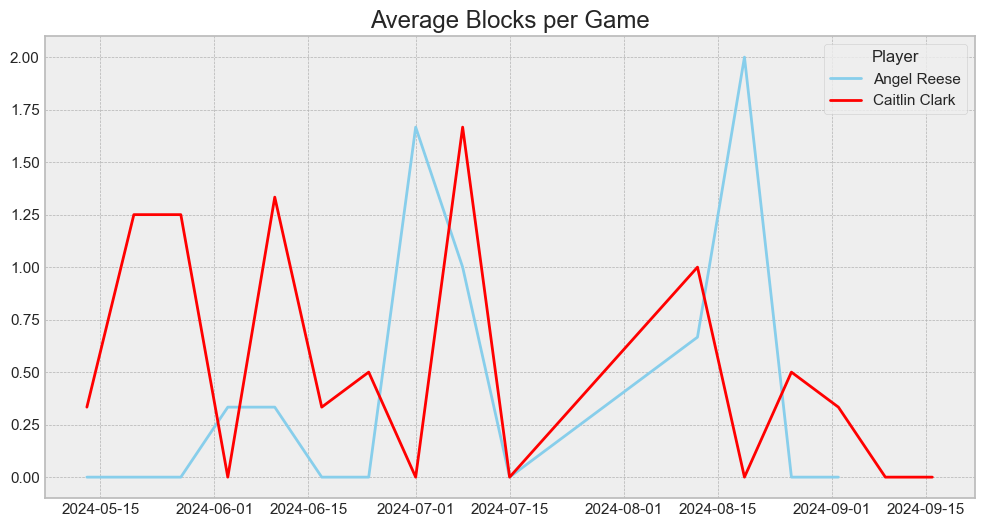

In [108]:
avg_block=roty.groupby(['WEEK','PLAYER'])['BLK'].mean().reset_index(name='avg_blocks')
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_block,x='WEEK',y='avg_blocks',hue='PLAYER',palette=palette,ci=None)
plt.title('Average Blocks per Game')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Player')
plt.show()

In [110]:
avg_blocks=roty.groupby('PLAYER')['BLK'].mean().round(2).reset_index(name='AVG_BLK')
avg_blocks

,PLAYER,AVG_BLK
0,Angel Reese,0.47
1,Caitlin Clark,0.68


Neither player averages a high number of blocks per game, Clark averages **0.68**, while Reese records **0.47** blocks per game.

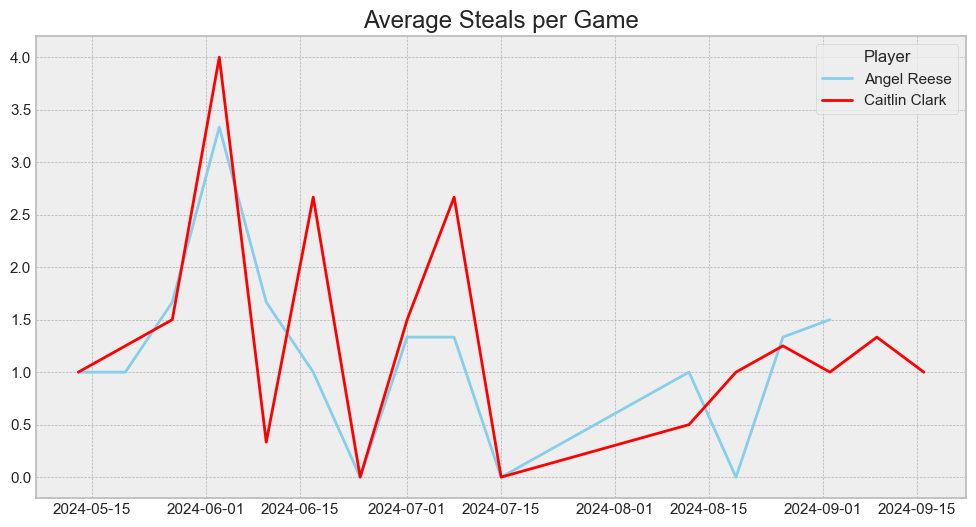

In [113]:
avg_steal=roty.groupby(['WEEK','PLAYER'])['STL'].mean().reset_index(name='avg_steals')
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_steal,x='WEEK',y='avg_steals',hue='PLAYER',palette=palette,ci=None)
plt.title('Average Steals per Game')
plt.xlabel('')
plt.ylabel('')
plt.legend(title='Player')
plt.show()

In [115]:
avg_steals=roty.groupby('PLAYER')['STL'].mean().round(2).reset_index(name='AVG_STL')
avg_steals

,PLAYER,AVG_STL
0,Angel Reese,1.29
1,Caitlin Clark,1.32


When it comes to defense, both players averaged **1.3** steals per game.

In [102]:
best_game_idx = roty.groupby('PLAYER_NAME')['PLUS_MINUS'].idxmax()
best_performance = roty.loc[best_game_idx]
best_performance.drop(columns={'MONTH','WEEK','TEAM_ABBREVIATION'},inplace=True)
best_performance

,PLAYER_NAME,TEAM_NAME,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
63,Angel Reese,Chicago Sky,2024-07-16,CHI @ LVA,W,35,4,10,0.400,0,0,NaN,5,6,0.833,2,8,10,3,0,0,1,3,13,26
31,Caitlin Clark,Indiana Fever,2024-08-30,IND @ CHI,W,32,8,14,0.571,5,9,0.556,10,11,0.909,0,4,4,12,1,0,3,3,31,23


Clark's best performance came against the Chicago Sky, where she delivered an impressive **double-double** with **31 points** and **12 assists**. She shot approximately **60%** from the field, **55%** from three-point range, and **90%** from the free-throw line.   
Angel Reese's standout game was against the Las Vegas Aces, where she also recorded a **double-double**, finishing with **13** points and **10** rebounds. She shot 40% from the field and an impressive **83%** from the free-throw line.

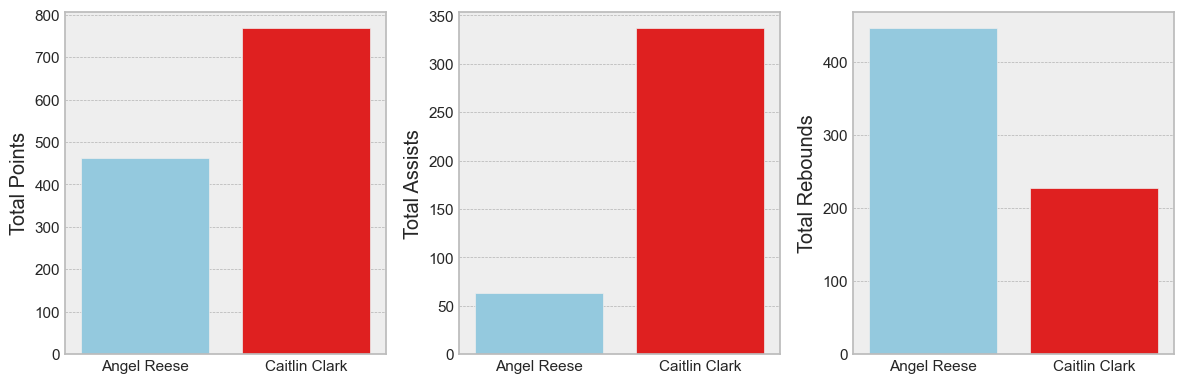

In [114]:
total=roty.groupby('PLAYER_NAME')[['PTS','AST','REB']].sum()
fig, axs = plt.subplots(1,3, figsize=(12, 4))

sns.barplot(data=total,x='PLAYER_NAME',y='PTS',hue='PLAYER_NAME',palette=palette,ax=axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('Total Points')
sns.barplot(data=total,x='PLAYER_NAME',y='AST',hue='PLAYER_NAME',palette=palette,ax=axs[1])
axs[1].set_xlabel('')
axs[1].set_ylabel('Total Assists')
sns.barplot(data=total,x='PLAYER_NAME',y='REB',hue='PLAYER_NAME',palette=palette,ax=axs[2])
axs[2].set_xlabel('')
axs[2].set_ylabel('Total Rebounds')
plt.tight_layout()
plt.show()

In [116]:
total

,PTS,AST,REB
PLAYER_NAME,,,
Angel Reese,462,63,446
Caitlin Clark,769,337,227


In [164]:
avg_performance=roty.groupby('PLAYER_NAME')[['PTS','AST','REB']].mean().round(1)
avg_performance

,PTS,AST,REB
PLAYER_NAME,,,
Angel Reese,13.6,1.9,13.1
Caitlin Clark,19.2,8.4,5.7


Caitlin Clark scored a total of **769** points during the season, averaging **19.2** points per game, which ranked her **7th** in the league. In comparison, Angel Reese finished with **462** points, placing **28th** overall. Clark also led the entire league in assists, not just among rookies, but across all players, with an impressive **337** assists, averaging **8.4** per game. On the other hand, Angel Reese was a force on the glass, leading the league in total rebounds with **446**, averaging **13.1** rebounds per game.

In [172]:
stats = ['REB', 'AST', 'STL', 'BLK', 'PTS']
double_double = roty[['PLAYER_NAME'] + stats].copy()
double_double['double_digits'] = double_double[stats].ge(10).sum(axis=1)
double_double['double_double'] = double_double['double_digits'] >= 2

double_double_count = double_double.groupby('PLAYER_NAME')['double_double'].sum().reset_index(name='double_doubles')
double_double_count

,PLAYER_NAME,double_doubles
0,Angel Reese,26
1,Caitlin Clark,14


While Caitlin Clark showcased her all-around game with **14** double-doubles, Angel Reese stood out with a remarkable **26** double-doubles, the most among all rookies. This stat highlights Reese’s consistency and dominance in the paint, particularly as a rebounder and interior scorer.

In [174]:
stats = ['REB', 'AST', 'STL', 'BLK', 'PTS']
triple_double = roty[['PLAYER_NAME'] + stats].copy()
triple_double['double_digits'] = triple_double[stats].ge(10).sum(axis=1)
triple_double['triple_double'] = triple_double['double_digits'] >= 3

triple_double_count = triple_double.groupby('PLAYER_NAME')['triple_double'].sum().reset_index(name='triple_doubles')
triple_double_count

,PLAYER_NAME,triple_doubles
0,Angel Reese,0
1,Caitlin Clark,2


Caitlin Clark became the first rookie in WNBA history to record a triple-double, and she eventually did it twice. The first one was **19** points, **12** rebounds and **13** assists in an 83-78 win over the New York Liberty on July 6. The second happened Sept. 4 with **24** points, **10** rebounds and **10** assists in a 93-86 victory over the Los Angeles Sparks.

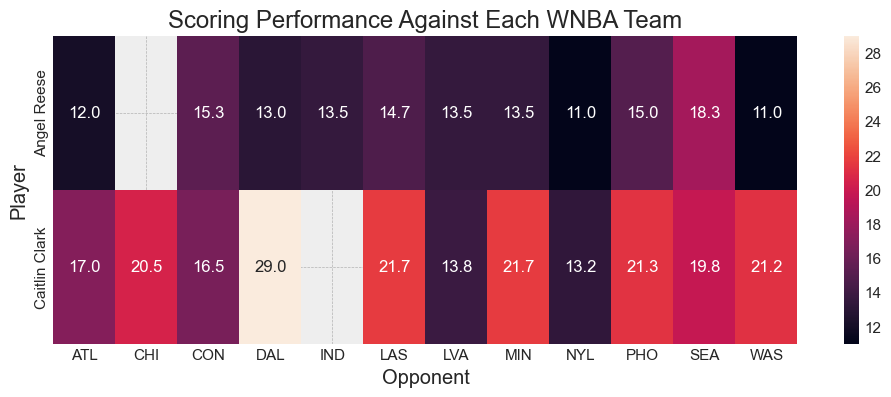

In [13]:
roty['OPPONENT'] = roty['MATCHUP'].str.extract(r'(?:@|vs\.) (\w+)', expand=False)
opponent_perf = roty.groupby(['PLAYER_NAME', 'OPPONENT'])['PTS'].mean().unstack()

plt.figure(figsize=(12,4))
sns.heatmap(opponent_perf, annot=True, fmt=".1f")
plt.title("Scoring Performance Against Each WNBA Team")
plt.xlabel("Opponent")
plt.ylabel("Player")
plt.show()

In [50]:
clark_max = roty[roty['PLAYER'] == 'Caitlin Clark'].sort_values(by='PTS', ascending=False).head(1)
reese_max = roty[roty['PLAYER'] == 'Angel Reese'].sort_values(by='PTS', ascending=False).head(1)
highest_games = pd.concat([clark_max, reese_max])
highest_games[['PLAYER','TEAM_NAME','GAME_DATE','MATCHUP','WL','PTS','AST','REB','PLUS_MINUS']]

,PLAYER,TEAM_NAME,GAME_DATE,MATCHUP,WL,PTS,AST,REB,PLUS_MINUS
38,Caitlin Clark,Indiana Fever,2024-09-15,IND vs. DAL,W,35,8,2,1
58,Angel Reese,Chicago Sky,2024-07-05,CHI @ SEA,W,27,2,10,7


Caitlin Clark had her highest scoring average against the Dallas Wings, highlighted by a standout performance where she scored a WNBA career-high **35 points**. According to ESPN, that game also set a new rookie single-season scoring record for the Indiana Fever. Similarly, Angel Reese averaged the most points against the Seattle Storm, including her career-high **27-point** game, which stands as her top-scoring performance in the WNBA so far.

### 3. Conclusion

**Caitlin Clark** emerged as an offensive powerhouse and playmaker, finishing **7th** in the league in total points **(769)** and **1st** in assists **(337)**, a remarkable feat not just for a rookie, but for any player. She also showed strong shooting efficiency, especially in her record-setting **35-point** game against the Dallas Wings. Her ability to both score and create for others made her a central figure in the Indiana Fever’s offense and a headline name across the league. Most notably, Clark helped lead the Fever to the WNBA Playoffs for the first time since 2016, proving her ability to elevate not only her own game but her entire team.

**Angel Reese**, on the other hand, established herself as a dominant force in the paint. She led the entire league in total rebounds **(446)** and finished the season with an outstanding **26** double-doubles, the most among all rookies and one of the highest overall. Her consistency and physical presence were key to the Chicago Sky's competitiveness, especially highlighted in her **27-point** career-high performance against the Seattle Storm.